# **Project Name**    - Yes bank Stock closing price prediction



##### **Project Type**    - Regression
##### **Contribution**    - Bableen Kaur

# **Project Summary -**

This project focuses on predicting the closing stock price of YES Bank using historical monthly stock data through various machine learning techniques. The central goal was to evaluate and compare different regression models and determine the most accurate and interpretable model for forecasting the bank’s stock price, based on the features available in the dataset.

The dataset was contained with 5 features, namely: Date, Open, High, Low and Close depicting the monthly records of stock prices of YES Bank. The Date column was converted from a string object to a datetime object for easier manipulation and indexing.

The dataset used spans from July 2005 to June 2020, containing monthly records of YES Bank’s stock prices. 
As the task is to predict a continuous numerical value, so it is a regression problem.

Also, we explored the relationship between the input and output variables , ie, open, high and low with close.
Findings revealed strong relationship of all features with the dependent feature, ie, Close price using pairplots, heatmap, scatterplot, lineplot, etc.

As many columns displayed positive skewness, particularly the Close price, we applied data transformation techniques. The Box-Cox transformation was chosen over log and square root transforms due to its effectiveness in normalizing the skewed distributions. Afterwards, Min-Max scaling was used to normalize the range of values between 0 and 1, improving model convergence and interpretation.

We explored 4 models in this case: Linear Regression, Random Forest Regressor, XGBoost Regressor and Decision Tree regressor.

We found that Linear Regression emerged as the best-performing model due to the nature of the dataset and the strong linear dependencies between variables.

We used Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE) and R² Score to evaluate the performance , as it was a regression problem. 

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


To develop a machine learning model that accurately predicts the closing stock price of YES Bank based on historical data, using features such as Open, High, and Low prices. As Stock market prices are influenced by multiple factors and often exhibit patterns over time. By using machine learning techniques, the goal is to capture underlying trends and relationships within the historical data to make informed predictions. The challenge lies in preparing the data effectively, handling outliers, addressing skewness, and choosing the most appropriate model that balances accuracy and generalizability.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [235]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [540]:
# Load Dataset
df=pd.read_csv("yesbank.csv")

### Dataset First View

In [164]:
# Dataset First Look
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Dataset Rows & Columns count

In [167]:
# Dataset Rows & Columns count
df.shape

(185, 5)

### Dataset Information

In [170]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [173]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

This indicates, no duplicate rows are there in the dataset, we can hence check for duplicate values in each columnn

In [176]:
for col in df.columns:
    duplicate_count = df[col].duplicated().sum()
    print(f"{col}: {duplicate_count}")

Date: 0
Open: 2
High: 1
Low: 2
Close: 0


#### Missing Values/Null Values

In [179]:
# Missing Values/Null Values Count
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

This indicates there are no missing values in any column.

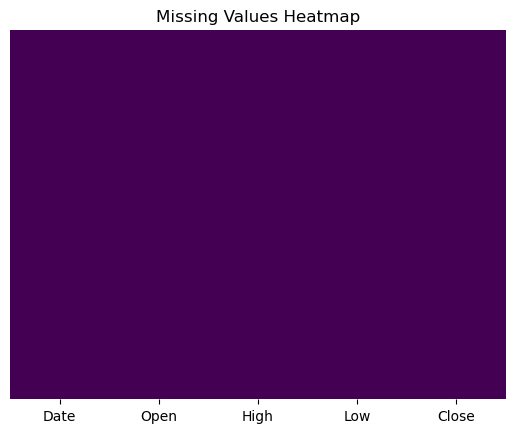

In [182]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

### What did you know about your dataset?

1) I know that the dataset does not contain any missing values. Although, it contains 2 duplicate values in the columns open and low , and 1 in high, but this does not affect as much because this is a small number.
2) I know that the it has 5 columns , of which one is dependent feature "close", which is a numerical feature.
3) Date is a object type feature, and all other are numerical features .

## ***2. Understanding Your Variables***

In [187]:
# Dataset Columns
df.columns


Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [189]:
# Dataset Describe
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description

1) Date: Month and year of the trading data 
2) Open: The stock price at the beginning of the month.
3) High: The highest price reached in that month.
4) Low: The lowest price reached in that month.
5) Close: The stock price at the end of the month.


## 3. ***Data Wrangling***

### Data Wrangling Code

In [542]:
# Write your code to make your dataset analysis ready.

# converting date from object type to date time type:
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')
df.tail()

,Date,Open,High,Low,Close
180,2020-07-01,25.60,28.30,11.10,11.95
181,2020-08-01,12.00,17.16,11.85,14.37
182,2020-09-01,14.30,15.34,12.75,13.15
183,2020-10-01,13.30,14.01,12.11,12.42
184,2020-11-01,12.41,14.90,12.21,14.67


## ***4. Data Vizualization***

#### Chart - 1 : LINE CHART

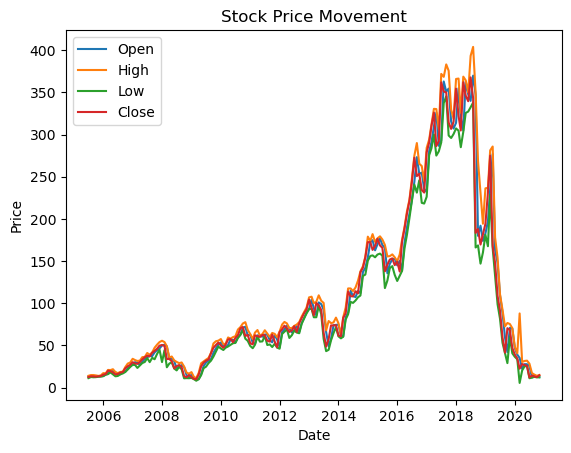

In [402]:
# Chart - 1 visualization code
import matplotlib.pyplot as plt
# Stock prices over time 
plt.plot(df['Date'], df['Open'], label='Open')
plt.plot(df['Date'], df['High'], label='High')
plt.plot(df['Date'], df['Low'], label='Low')
plt.plot(df['Date'], df['Close'], label='Close')
plt.title('Stock Price Movement')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


##### 1. Why did you pick the specific chart?

Plotting the Stock prices over time allows us to clearly observe how the stock price has trended and fluctuated month over month, year over year. 

##### 2. What is/are the insight(s) found from the chart?

The chart reveals that YES Bank's stock prices showed significant growth up until around 2018, after which the prices declined sharply. These insights reflect that YES Bank had financial crisis in 2019–2020.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can help businesses and investors understand when the stock was at peak performance.

This drop could reflect internal financial issues, mismanagement, or market perception shifts — all of which negatively impact investor trust. Identifying such turning points is essential not just for avoiding future mistakes, but also for crisis management

#### Chart - 2 : BOXPLOT

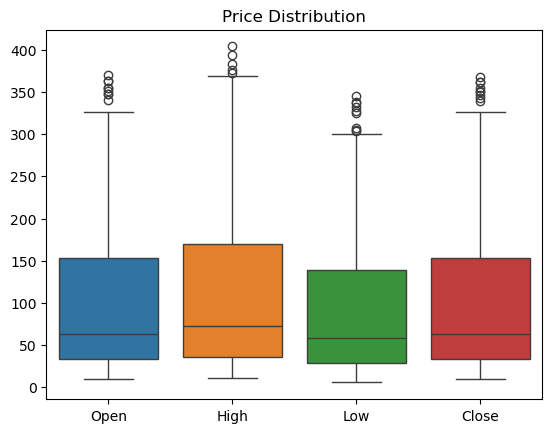

In [195]:
# Chart - 2 visualization code
import seaborn as sns
sns.boxplot(data=df[['Open', 'High', 'Low', 'Close']])
plt.title("Price Distribution")
plt.show()



##### 1. Why did you pick the specific chart?

The boxplot was selected because it is a powerful statistical visualization used to identify the distribution, central tendency, and spread of numeric variables, while also highlighting the presence of outliers.

##### 2. What is/are the insight(s) found from the chart?

All four price variables (Open, High, Low, and Close) exhibit positive skewness, as seen by the longer whiskers and presence of extreme outliers on the upper end of the distributions. While prices remained low for most periods, Numerous outliers are present in all columns, especially in the higher price ranges, indicating periods where the stock price surged significantly

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes, the detection of outliers and skewness is extremely valuable for data cleaning and transformation — which directly improves model performance and prediction accuracy.

The presence of extreme outliers suggests periods of sudden spikes or drops, which could be due to instability in the company’s financials or market perception.

#### Chart - 3: Scatterplot

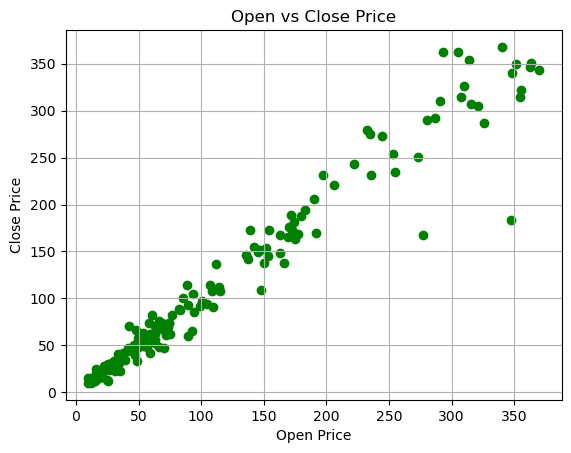

In [405]:
# Chart - 3 visualization code
plt.scatter(df['Open'], df['Close'], color='green')
plt.title('Open vs Close Price')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()


##### 1. Why did you pick the specific chart?

The scatter plot was chosen because it is the most appropriate chart to visualize the relationship or correlation between two continuous variables.

##### 2. What is/are the insight(s) found from the chart?

There is a strong positive correlation between Open and Close prices: as the Open price increases, the Close price generally increases too.

A few points deviate significantly from the linear cluster, suggesting anomalous trading behavior or volatile market sessions during certain months.

The concentration of points at the lower end indicates that majority of trading happened when prices were low, confirming what was seen in the boxplot.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This observed positive relationship is valuable for predictive modeling — it suggests that Open price can be a good predictor of Close price.

The presence of scattered outlier points may reflect market instability or panic trading, where stocks opened at one price but closed unexpectedly higher or lower. If such anomalies go undetected, models may overfit or underperform on real-world predictions, especially during volatile economic events.

#### Chart - 4 : Correlation Heatmap

           Open      High       Low     Close
Open   1.000000  0.993040  0.983978  0.977971
High   0.993040  1.000000  0.983422  0.985051
Low    0.983978  0.983422  1.000000  0.995358
Close  0.977971  0.985051  0.995358  1.000000


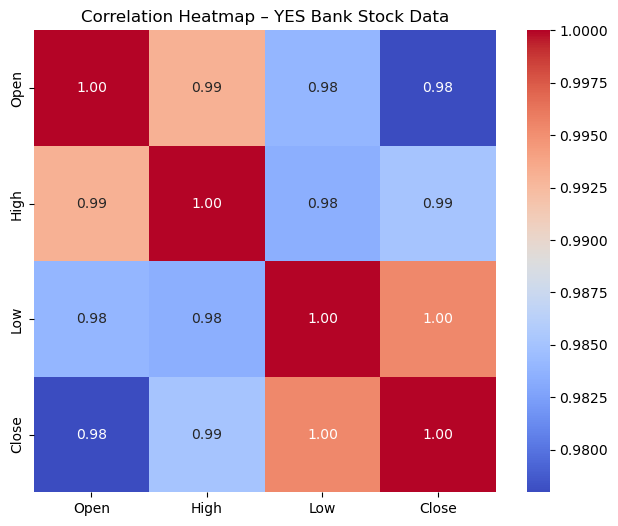

In [417]:
# Correlation Heatmap visualization code
corr_matrix = df[['Open', 'High', 'Low', 'Close']].corr()
print(corr_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap – YES Bank Stock Data')
plt.show()

##### 1. Why did you pick the specific chart?

The correlation heatmap was selected because it is an effective visualization to quickly identify the linear relationship between multiple numerical variables. A heatmap makes it easy to visually compare correlation coefficients using color gradients and annotated values. This also helps in feature selection in high dimensional data.

##### 2. What is/are the insight(s) found from the chart?

All variables are highly positively correlated with each other, with correlation coefficients mostly above 0.98.The Low price has the strongest correlation with the Close price. Also we can see that independent features are also related to each other, leading to multicollinearity, that can affect linear regression.

#### Chart - 5 : Pair Plot

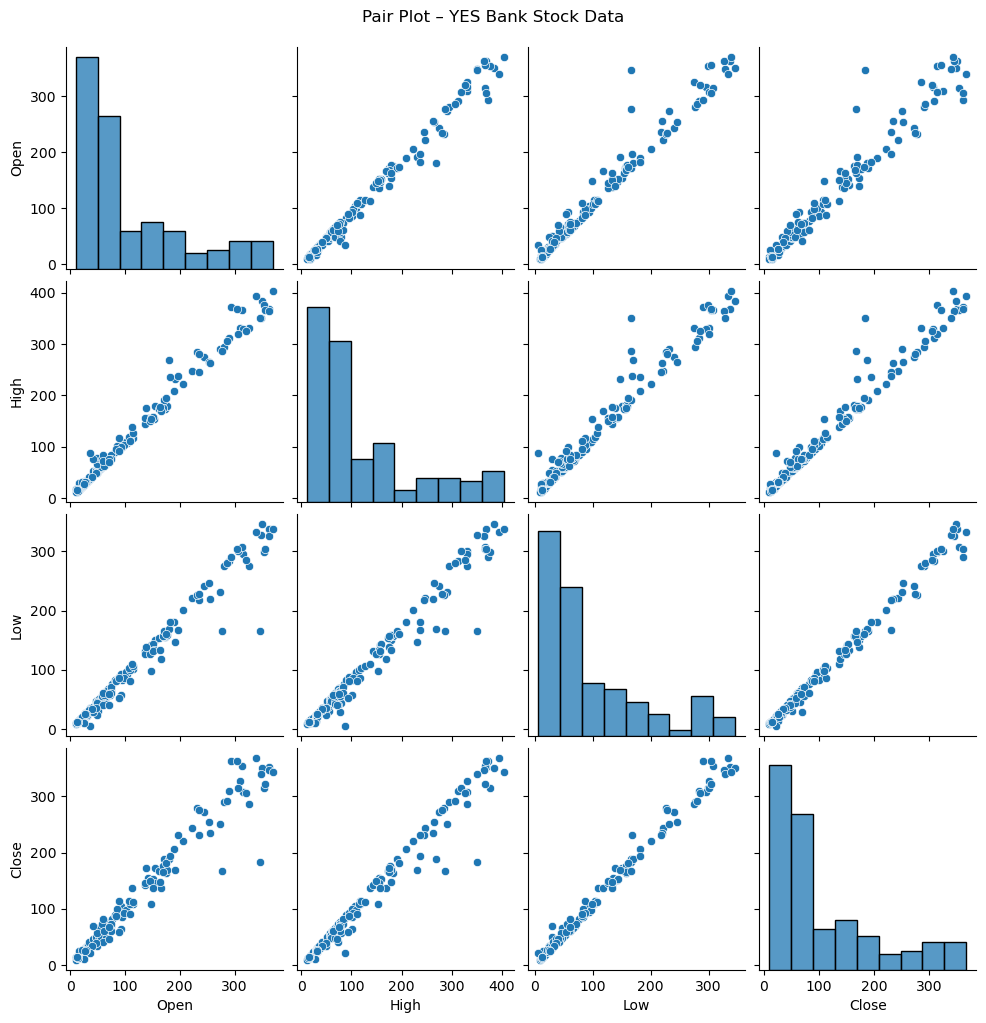

In [422]:
# Pair Plot visualization code
sns.pairplot(df)
plt.suptitle('Pair Plot – YES Bank Stock Data', y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

The pair plot was chosen because it is an excellent visual tool to explore pairwise relationships between multiple numerical features in a dataset.

##### 2. What is/are the insight(s) found from the chart?

The scatter plots in the grid show strong positive linear relationships between all pairs. 

All four features (Open, High, Low, Close) are right-skewed, with most values concentrated on the lower end, and some extreme high values (outliers).

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1 : There is no significant difference between the Open and Close prices of YES Bank.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis :There is no significant difference between the average Open and Close prices.( Mean difference between Open and Close prices = 0)

Alternate Hypothesis : There is a significant difference between the average Open and Close prices.( Mean difference between Open and Close prices != 0)

#### 2. Perform an appropriate statistical test.

In [544]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_rel

stat, p_value = ttest_rel(df['Open'], df['Close'])
print("P-Value:", p_value)


P-Value: 0.825365920365391


##### Which statistical test have you done to obtain P-Value?

We used Paired sample T-test here

##### Why did you choose the specific statistical test?

As we are comparing two related numerical variables for the same observation (i.e., Open and Close prices of each month).


##### Result:
Since p-value (0.825) > 0.05, we fail to reject the null hypothesis. So, There is no statistically significant difference between the Open and Close prices of YES Bank in the dataset.
This suggests that on average, the stock opens and closes at roughly the same price each month — indicating low volatility within monthly intervals

### Hypothetical Statement - 2: There is a strong correlation between Low and Close prices.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H₀: No correlation between Low and Close prices (correlation = 0)

H₁: There is correlation (correlation != 0)

#### 2. Perform an appropriate statistical test.

In [549]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import pearsonr
corr, p_value = pearsonr(df['Low'], df['Close'])
print("Correlation:", corr)
print("P-value:", p_value)

Correlation: 0.9953579476474369
P-value: 5.34555367606804e-188


##### Which statistical test have you done to obtain P-Value?

I performed Pearson Correlation Test here.


##### Why did you choose the specific statistical test?

As this test measures the strength and direction of a linear relationship between two continuous variables.


#### Result
Since p-value < 0.05 (actually it's far smaller), we reject the null hypothesis (H₀).
There is a very strong positive linear correlation between Low and Close prices.
This means that whenever the low price increases, the close price also tends to increase, and vice versa.

Therefore, If a trader observes a particular day or month with a higher-than-usual Low price, they can reasonably expect a high Close price as well.

### Hypothetical Statement - 3: Outliers affect the average Close price.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H₀:There is no significant difference between the mean Close prices with and without outliers.( Mean Close price with outliers = Mean Close price without outliers.)

H₁: There is a significant difference between the mean Close prices with and without outliers.( They are not equal – i.e., outliers change the average significantly)

#### 2. Perform an appropriate statistical test.

In [554]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind

Q1 = df['Close'].quantile(0.25)
Q3 = df['Close'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
filtered_df = df[(df['Close'] >= lower) & (df['Close'] <= upper)]

stat, p_value = ttest_ind(df['Close'], filtered_df['Close'])
print("P-value:", p_value)


P-value: 0.18855962603425316


##### Which statistical test have you done to obtain P-Value?

We conducted Independent Sample T-Test

##### Why did you choose the specific statistical test?

As it is used to compare the means of two independent groups

#### Result
Since p-value (0.1885) > 0.05, we fail to reject the null hypothesis.

There is no statistically significant evidence that outliers in the Close price column have a strong impact on the overall mean. The average Close price remains relatively stable, even when outliers are present or removed. Therefore, Removing them does not change the mean significantly.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [429]:
# No missing values were present in the Dataset

### 2. Handling Outliers

In [460]:
cols = ['Open', 'High', 'Low', 'Close']

# Function to detect and print outliers 
def detect_outliers_temp(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f'\nOutliers in "{col}": Values below {lower} or above {upper}')
    print(outliers[['Date', col]])
    return len(outliers)

# Print outliers for each column
outlier_counts = {}
for col in cols:
    count = detect_outliers_temp(df, col)
    outlier_counts[col] = count

print("\nOutlier count per column:")
for col, count in outlier_counts.items():
    print(f"{col}: {count}")



Outliers in "Open": Values below -145.0 or above 331.8
          Date    Open
145 2017-08-01  363.00
146 2017-09-01  351.00
147 2017-10-01  354.60
151 2018-02-01  355.00
154 2018-05-01  362.85
155 2018-06-01  348.00
156 2018-07-01  340.00
157 2018-08-01  369.95
158 2018-09-01  347.20

Outliers in "High": Values below -163.435 or above 368.765
          Date    High
144 2017-07-01  372.00
146 2017-09-01  383.25
147 2017-10-01  375.75
156 2018-07-01  393.35
157 2018-08-01  404.00

Outliers in "Low": Values below -136.25 or above 303.11
          Date     Low
145 2017-08-01  337.37
146 2017-09-01  345.50
150 2018-01-01  307.35
151 2018-02-01  304.65
153 2018-04-01  303.30
154 2018-05-01  325.70
155 2018-06-01  327.35
156 2018-07-01  332.45
157 2018-08-01  338.00

Outliers in "Close": Values below -146.325 or above 333.07500000000005
          Date   Close
144 2017-07-01  361.96
145 2017-08-01  351.15
146 2017-09-01  350.00
150 2018-01-01  354.45
153 2018-04-01  362.05
154 2018-05-01  346

##### What all outlier treatment techniques have you used and why did you use those techniques?

I used the Interquartile Range (IQR) method to detect outliers.
his is a robust statistical method that doesn’t assume a normal distribution. It identifies values that fall outside the Interquartile range.

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 3. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

yes, as all numerical features (Open, High, Low, Close) were positively skewed (i.e., the tail was longer on the right) and Outliers were detected using the IQR method.
I used Boxcox Trnsformation here, as Box-Cox chooses the best transformation function using a parameter called lambda. This makes it adaptive to the shape of your data — whether it’s slightly skewed or heavily skewed.

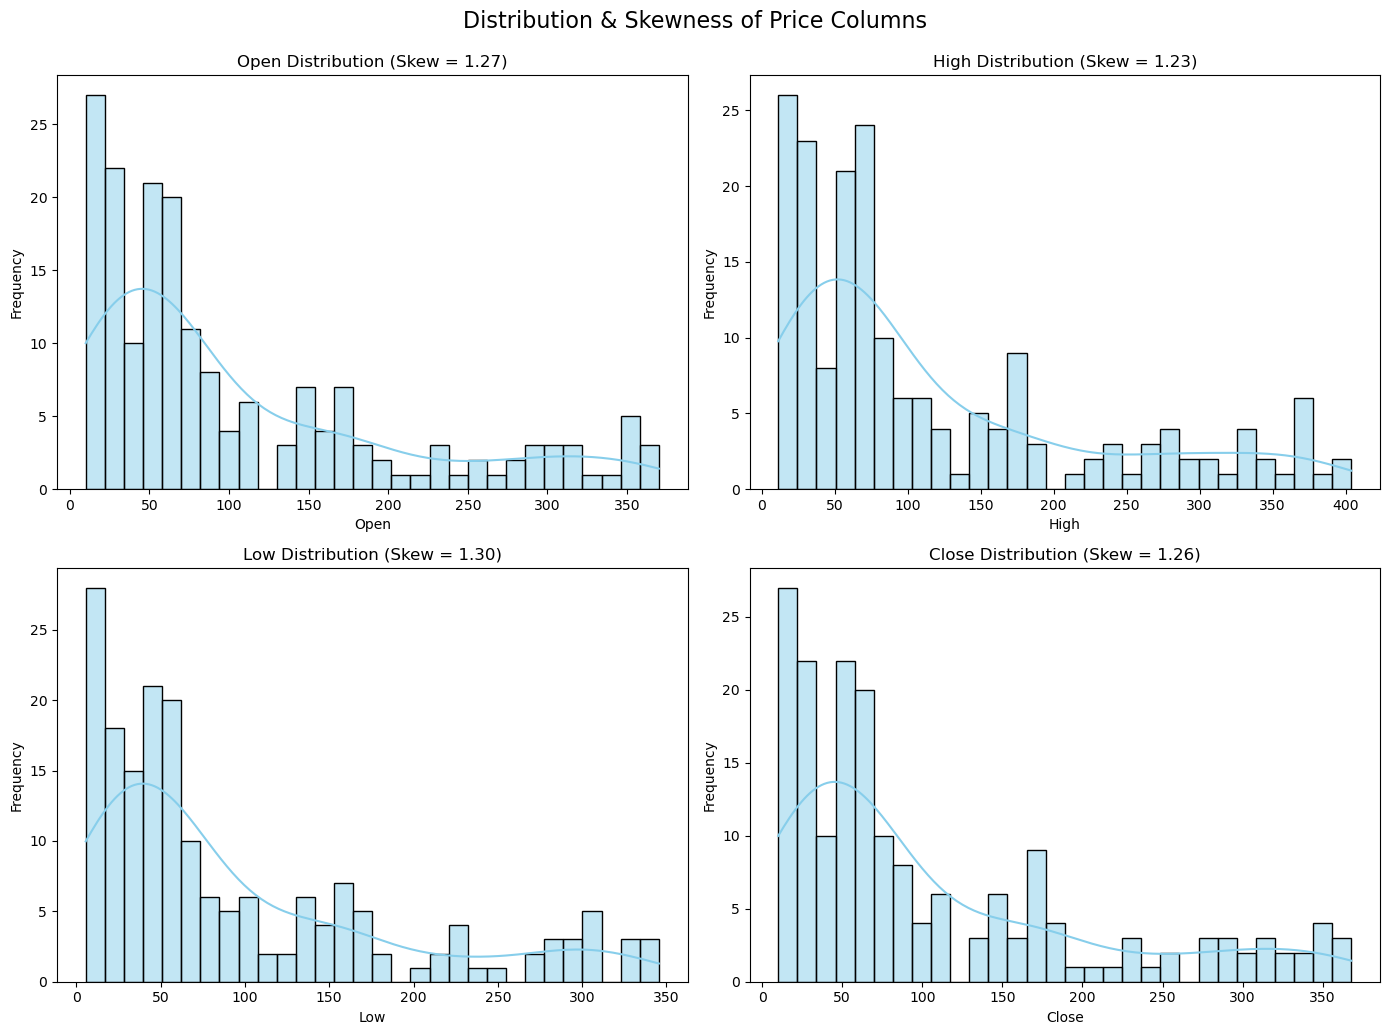

In [462]:
numeric_cols = ['Open', 'High', 'Low', 'Close']

# Set up plotting area
plt.figure(figsize=(14, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[col], kde=True, color='skyblue', bins=30)
    plt.title(f'{col} Distribution (Skew = {df[col].skew():.2f})')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
plt.tight_layout()
plt.suptitle("Distribution & Skewness of Price Columns", fontsize=16, y=1.03)
plt.show()

In [464]:
cols = ['Open', 'High', 'Low', 'Close']

#Boxcox transformation (to reduce skew)
for col in cols:
    df[col], _ = boxcox(df[col]) 
df.head()

,Date,Open,High,Low,Close
0,2005-07-01,2.613965,2.682707,2.493722,2.568818
1,2005-08-01,2.579869,2.745719,2.609925,2.645823
2,2005-09-01,2.651627,2.745024,2.585922,2.636499
3,2005-10-01,2.629821,2.716832,2.597132,2.612025
4,2005-11-01,2.641559,2.673812,2.637552,2.645049


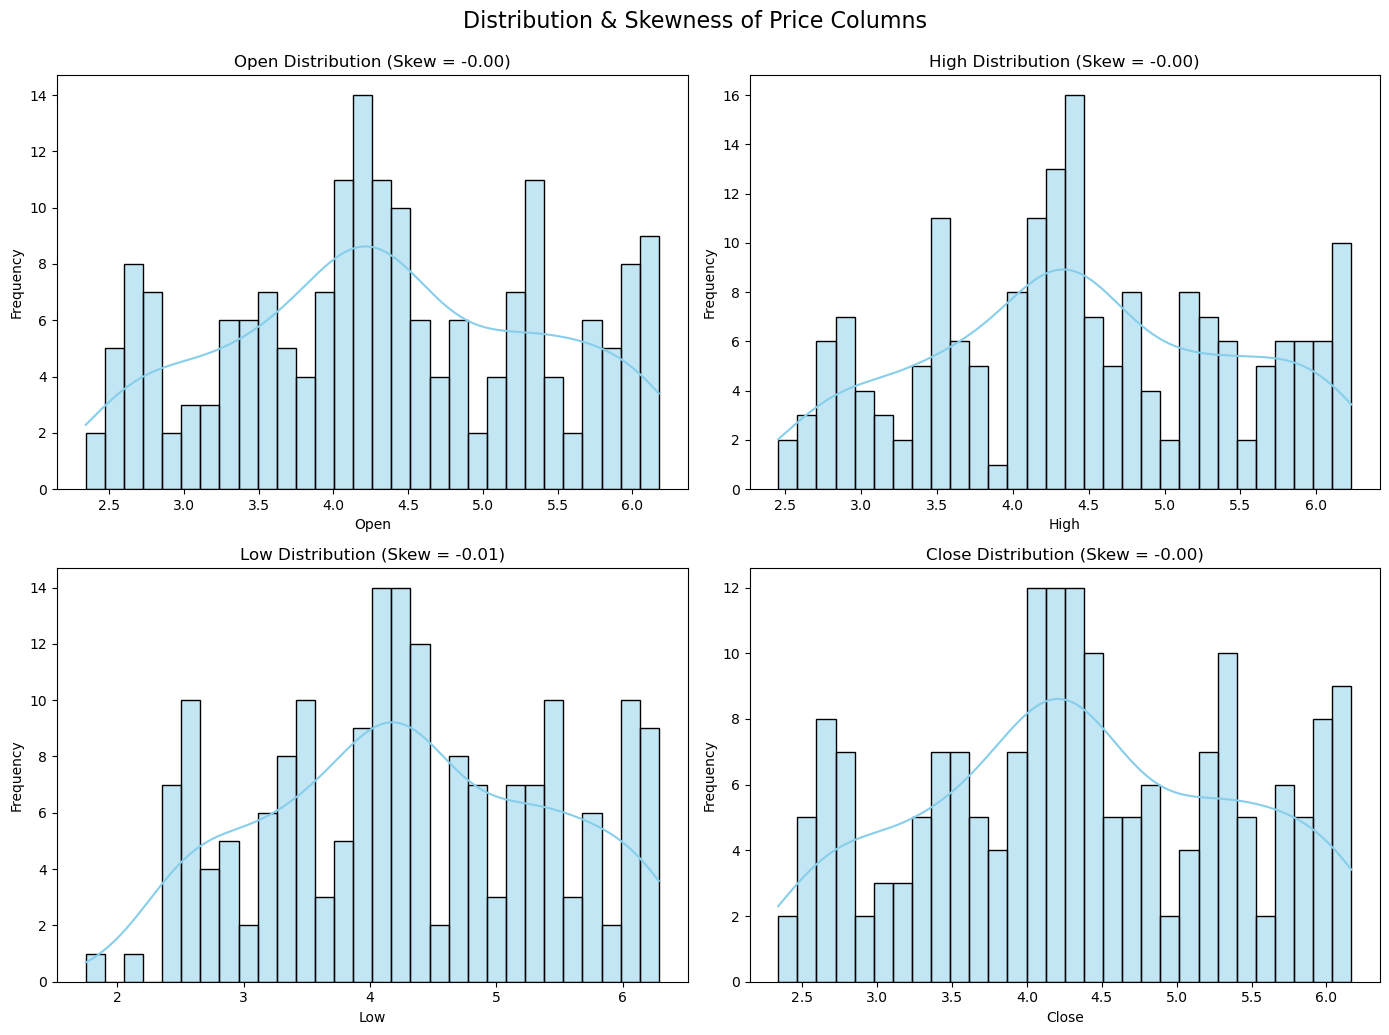

In [466]:
plt.figure(figsize=(14, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[col], kde=True, color='skyblue', bins=30)
    plt.title(f'{col} Distribution (Skew = {df[col].skew():.2f})')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
plt.tight_layout()
plt.suptitle("Distribution & Skewness of Price Columns", fontsize=16, y=1.03)
plt.show()

### 6. Data Scaling

In [468]:
# Scaling your data
#Min-Max scaling (normalize to [0,1])
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols] = scaler.fit_transform(df[cols])
df.head()

,Date,Open,High,Low,Close
0,2005-07-01,0.070885,0.060032,0.163924,0.060041
1,2005-08-01,0.061997,0.076728,0.189549,0.080163
2,2005-09-01,0.080703,0.076543,0.184256,0.077727
3,2005-10-01,0.075018,0.069074,0.186728,0.071331
4,2005-11-01,0.078078,0.057676,0.195641,0.079961


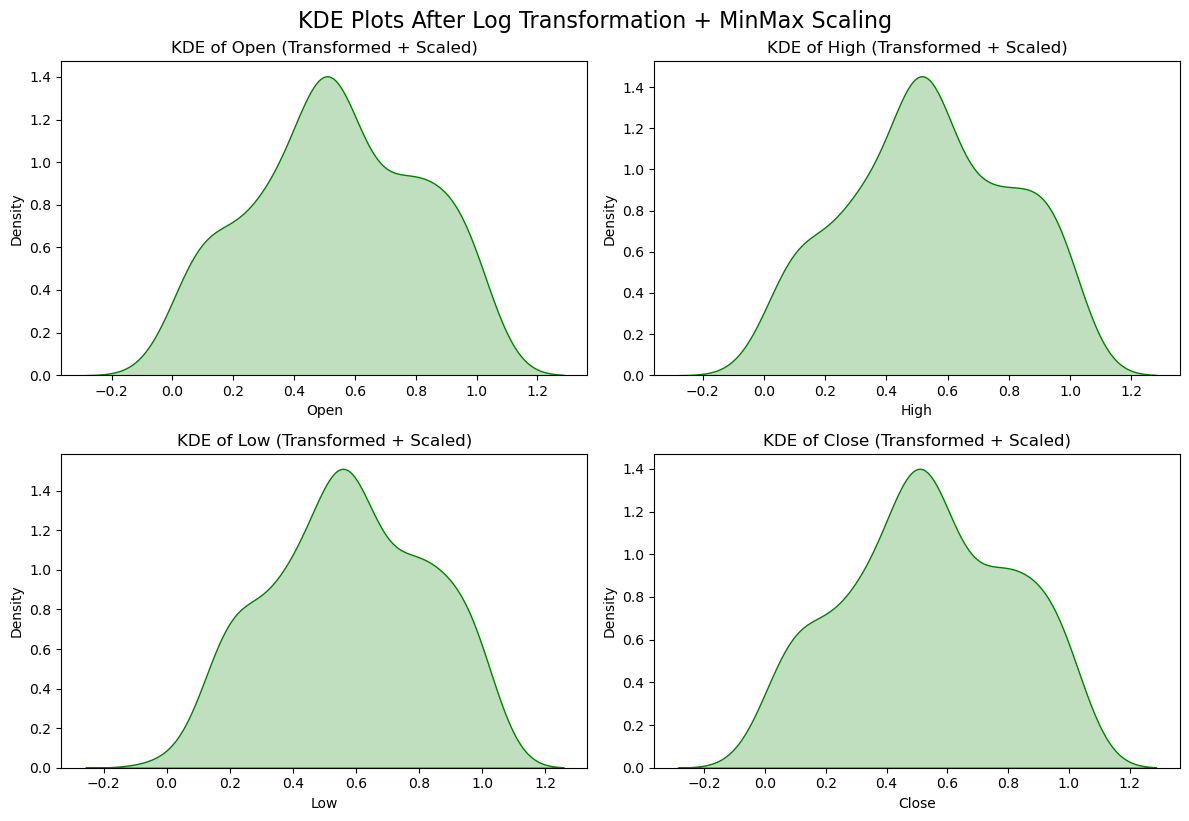

In [312]:
plt.figure(figsize=(12, 8))

for i, col in enumerate(cols):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(df[col], fill=True, color='green')
    plt.title(f'KDE of {col} (Transformed + Scaled)')
    plt.xlabel(col)
    plt.ylabel('Density')

plt.tight_layout()
plt.suptitle('KDE Plots After Log Transformation + MinMax Scaling', fontsize=16, y=1.02)
plt.show()

##### Which method have you used to scale you data and why?

As the stock prices (Open, High, Low, Close) had large differences in scale (ranging from 10 to near 400),
MinMaxScaler transforms each feature to a standard range of [0,1].

### 4. Dimensionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

No, dimensionality reduction is not necessary for this dataset as dataset contains only 4 numerical features

### 5. Data Splitting

In [484]:
# Split your data to train and test. Choose Splitting ratio wisely.
train_size = int(len(df) * 0.8)
train = df.iloc[:train_size]
test = df.iloc[train_size:]


##### What data splitting ratio have you used and why?

I used ratio , 80:20 : 80% training data and 20% testing data as it provides enough data for training while keeping aside a meaningful portion for testing performance on unseen data.

### 6. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

No , the dataset is not imbalanced, because it is a regression problem, not a classification problem.

## ***7. ML Model Implementation***

### ML Model - 1: Linear Regression

In [487]:
# ML Model - 1 Implementation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
features = ['Open', 'High', 'Low']
target = 'Close'

X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display values
print(f"MSE:  {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE:  {mae:.4f}")
print(f"R²:   {r2:.4f}")

MSE:  0.0010
RMSE: 0.0318
MAE:  0.0220
R²:   0.9904


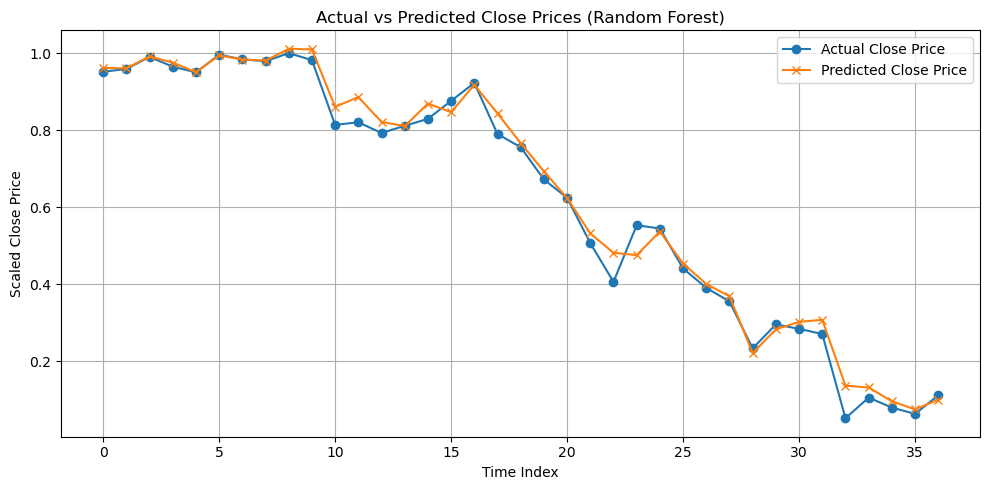

In [342]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual Close Price', marker='o')
plt.plot(y_pred, label='Predicted Close Price', marker='x')
plt.title('Actual vs Predicted Close Prices (Random Forest)')
plt.xlabel('Time Index')
plt.ylabel('Scaled Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

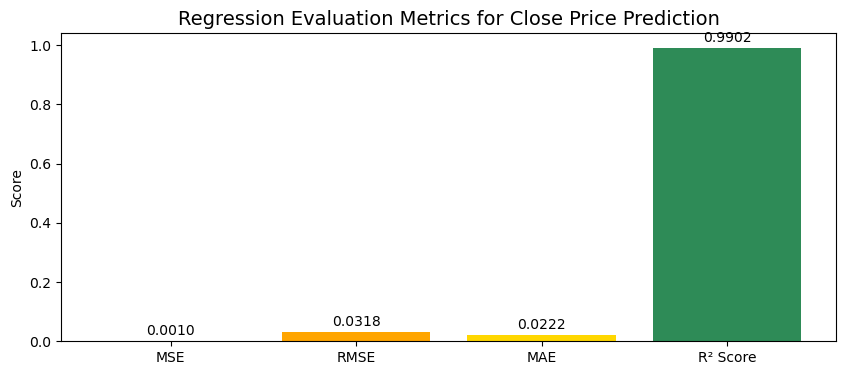

In [344]:
# Visualizing evaluation Metric Score chart
# Prepare data for plotting
metrics = ['MSE', 'RMSE', 'MAE', 'R² Score']
values = [mse, rmse, mae, r2]
colors = ['tomato', 'orange', 'gold', 'seagreen']

# Plot chart
plt.figure(figsize=(10, 4))
bars = plt.bar(metrics, values, color=colors)
plt.title('Regression Evaluation Metrics for Close Price Prediction', fontsize=14)
plt.ylabel('Score')

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f"{height:.4f}", ha='center', va='bottom')

plt.show()


The Linear Regression model performed exceptionally well, with very low error values (MAE, RMSE) and a high R² score of 0.9902

### ML Model - 2: Random Forest

In [494]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE:  {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE:  {mae:.4f}")
print(f"R²:   {r2:.4f}")

MSE:  0.0027
RMSE: 0.0521
MAE:  0.0345
R²:   0.9742


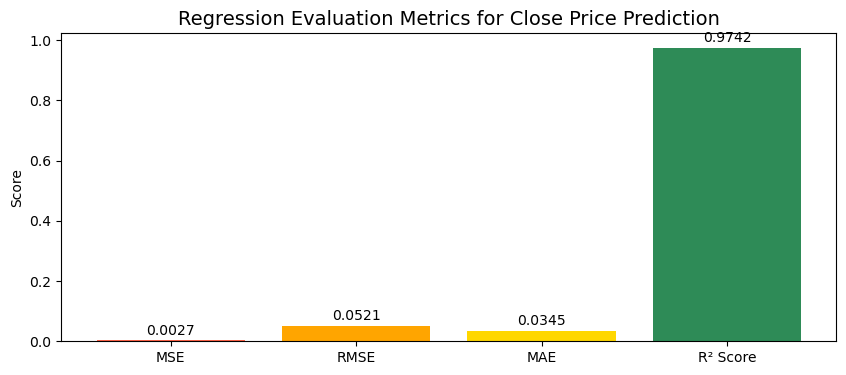

In [498]:
metrics = ['MSE', 'RMSE', 'MAE', 'R² Score']
values = [mse, rmse, mae, r2]
colors = ['tomato', 'orange', 'gold', 'seagreen']

plt.figure(figsize=(10, 4))
bars = plt.bar(metrics, values, color=colors)
plt.title('Regression Evaluation Metrics for Close Price Prediction', fontsize=14)
plt.ylabel('Score')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f"{height:.4f}", ha='center', va='bottom')

plt.show()

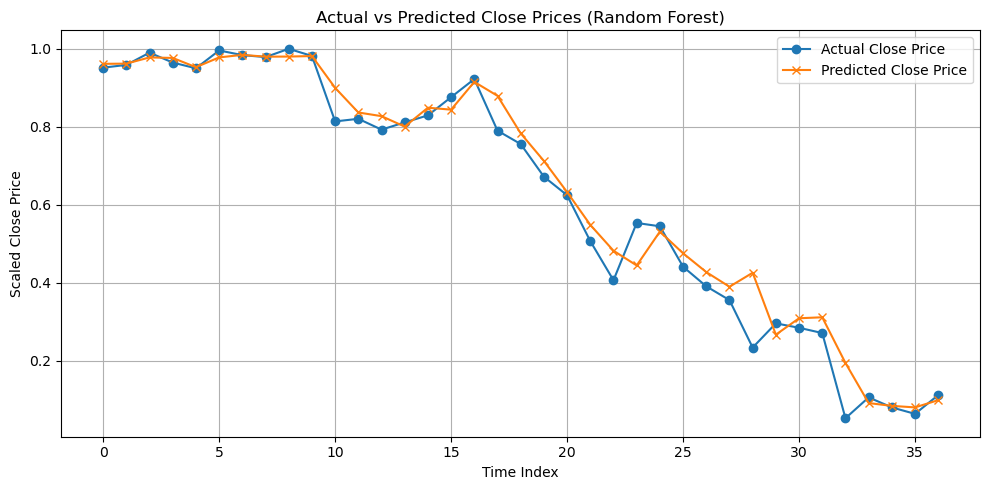

In [348]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual Close Price', marker='o')
plt.plot(y_pred, label='Predicted Close Price', marker='x')
plt.title('Actual vs Predicted Close Prices (Random Forest)')
plt.xlabel('Time Index')
plt.ylabel('Scaled Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Random Forest was used as it handles non-linear relationships between features very well ,unlike Linear Regression which assumes a straight-line fit, but did not performed better than linear regression as the data was mostly linear in nature

### Model 3: XGBOOST

In [516]:
# ML Model - 3 Implementation
!pip install xgboost

In [517]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"XGBoost Evaluation:")
print(f"MSE  : {mse:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"MAE  : {mae:.4f}")
print(f"R²   : {r2:.4f}")

XGBoost Evaluation:
MSE  : 0.0021
RMSE : 0.0459
MAE  : 0.0298
R²   : 0.9800


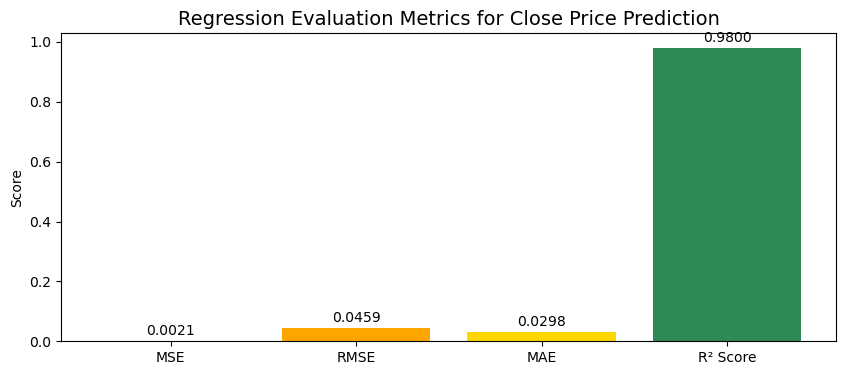

In [520]:
metrics = ['MSE', 'RMSE', 'MAE', 'R² Score']
values = [mse, rmse, mae, r2]
colors = ['tomato', 'orange', 'gold', 'seagreen']

# Plot chart
plt.figure(figsize=(10, 4))
bars = plt.bar(metrics, values, color=colors)
plt.title('Regression Evaluation Metrics for Close Price Prediction', fontsize=14)
plt.ylabel('Score')

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f"{height:.4f}", ha='center', va='bottom')

plt.show()

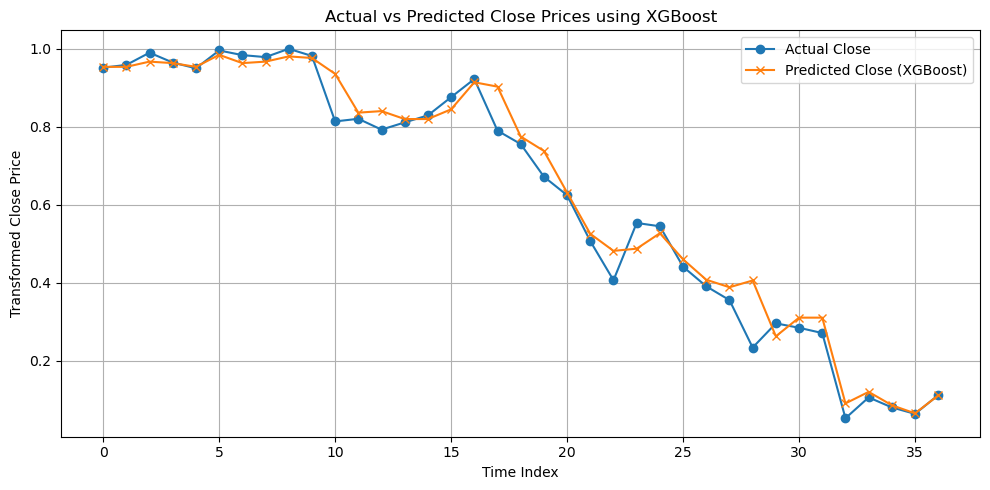

In [358]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual Close', marker='o')
plt.plot(y_pred, label='Predicted Close (XGBoost)', marker='x')
plt.title('Actual vs Predicted Close Prices using XGBoost')
plt.xlabel('Time Index')
plt.ylabel('Transformed Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


XGBoost performed better than Random Forest as It’s a boosting model, which learns patterns sequentially and corrects errors step-by-step. It Handles non-linearities and outliers better than simple models.

### Model 4: Decision Tree

In [528]:
# ML Model 
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE  : {mse:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"MAE  : {mae:.4f}")
print(f"R²   : {r2:.4f}")

MSE  : 0.0048
RMSE : 0.0696
MAE  : 0.0444
R²   : 0.9539


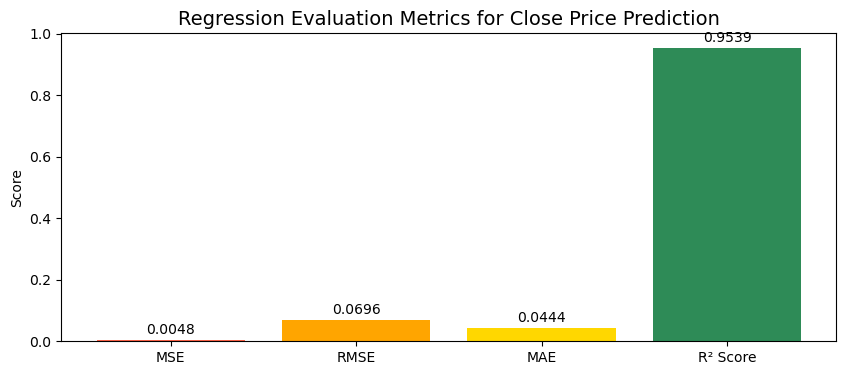

In [526]:
metrics = ['MSE', 'RMSE', 'MAE', 'R² Score']
values = [mse, rmse, mae, r2]
colors = ['tomato', 'orange', 'gold', 'seagreen']

# Plot chart
plt.figure(figsize=(10, 4))
bars = plt.bar(metrics, values, color=colors)
plt.title('Regression Evaluation Metrics for Close Price Prediction', fontsize=14)
plt.ylabel('Score')

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f"{height:.4f}", ha='center', va='bottom')

plt.show()

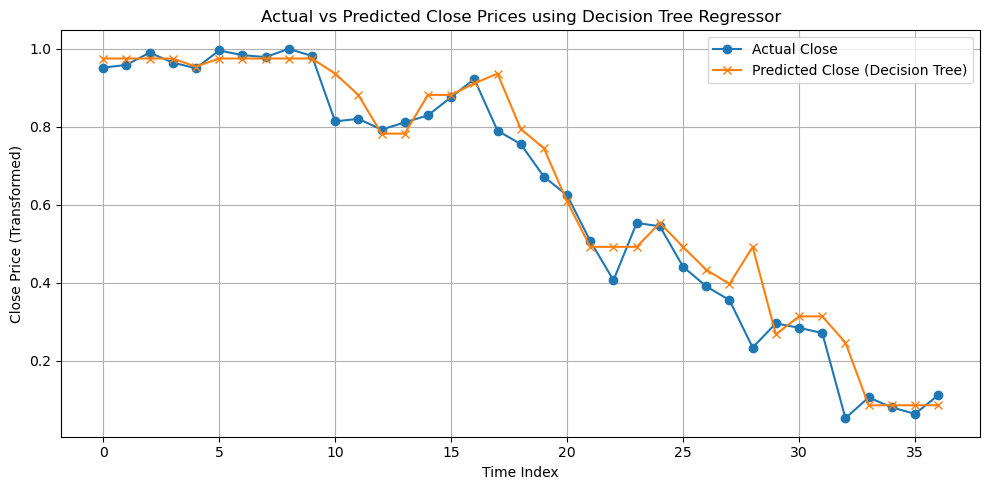

In [367]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual Close', marker='o')
plt.plot(y_pred, label='Predicted Close (Decision Tree)', marker='x')
plt.title('Actual vs Predicted Close Prices using Decision Tree Regressor')
plt.xlabel('Time Index')
plt.ylabel('Close Price (Transformed)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


It performed poorly amongst all the models used because a single tree often overfits to training data and performs poorly on test data unless pruned or tuned. Also, Decision Trees tend to be unstable with small datasets .

### 1. Which Evaluation metrics did you consider for a positive business impact and why

I used Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE) and R² Score to evaluate the performance , as it was a regression problem and they directly relate to financial accuracy, where even small prediction errors in closing stock price can lead to significant monetary impact in real-world trading decisions. Hence, minimizing RMSE and maximizing R² was crucial for business value.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I chose Linear Regression as final prediction model as it achieved highest R2 score of 0.9904 indicating excellent performance in capturing the variance in stock closing prices due to the inherent linear structure of the data.

# **Conclusion**

The objective of this project was to accurately predict the closing stock price of YES Bank using historical monthly data comprising features such as Open, High, Low, and Close prices. We began with data wrangling, identifying missing values and significant outliers using IQR-based methods. Given the skewness in the data, a Box-Cox transformation was applied, followed by Min-Max Scaling to normalize feature ranges and improve model training stability. Exploratory Data Analysis (EDA) revealed strong linear correlations between input features and the target variable, especially between Low and Close prices.We implemented 4 different regression models: Linear Regression, XGBoost Regressor, Random Forest Regressor and Decision Tree Regressor. The project successfully achieved its goal of predicting the closing stock price of YES Bank. The Linear Regression model proved to be the most accurate and efficient for this dataset.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***